### Carreau-Yasuda Model
#### $$ \frac{\eta - b}{a - b} = \frac{1}{\left[1 + \left(c \dot{\gamma}\right)^e\right]^{\frac{1 - d}{e}}} $$
#### $$ \eta = \frac{\eta_0 - \eta_{\infty}}{\left[1 + \left(\kappa \dot{\gamma}\right)^a\right]^{\frac{(1 - n)}{a}}} + \eta_{\infty} $$

In [1]:
import pandas as pd             # handle csv
import numpy as np              # math operations
import matplotlib.pyplot as plt # draw plots

# curve fitting packages
from scipy import optimize
from scipy.optimize import differential_evolution

# The model function - f : callable
def eta_(gamma, *p):
    eta_0   = p[0]
    eta_inf = p[1]
    kappa   = p[2]
    a       = p[3]
    n       = p[4]
    nume = eta_0 - eta_inf;
    base = 1 + (kappa * gamma)**a;
    expo = (1 - n)/a;
    deno = base**expo;
    return (nume/deno) + eta_inf;

def plotFitCurve(filename, parametersBounds):
    df       = pd.read_csv(filename)
    display(df.head())

    # The independent variable - xdata : array_like or object
    x = df["Shear Rate [1/s]"]
    # The dependent data - ydata : array_like
    y = df["Viscosity [Pa·s]"]

    plt.scatter(x, y)
    plt.xlabel("shear rate")
    plt.ylabel("viscosity")
    plt.xscale('log')
    plt.yscale('log')

    # Lower and upper bounds on parameters - bounds : 2-tuple of array_like, optional
    # Osswald, T., Rudolph, N., Osswald, T., & Rudolph, N. (2014). Generalized Newtonian Fluid (GNF)
    # Models. Polymer Rheology, 59–99. https://doi.org/10.3139/9781569905234.003

    # Initial guess for the parameters - p0 : array_like, optional
    
    # parameters  -> [eta_0, eta_inf, kappa, a, n]
    # *parameters -> eta_0 eta_inf kappa a n
    
    def sumOfSquaredError(parameters):
        y_model = eta_(x, *parameters)
        SOSE = sum((y - y_model)**2.0)
        return SOSE

    initialGuess   = differential_evolution(sumOfSquaredError, parametersBounds)
    parameterGuess = initialGuess.x
    print(parameterGuess)

    lowbound=[]
    upbound=[]
    for bound in parametersBounds:
        lowbound.append(bound[0])
        upbound.append(bound[1])

    model = optimize.curve_fit(
        eta_, x, y, parameterGuess,
        bounds = (lowbound, upbound)
    )
    fitParameters = model[0]
    print(fitParameters)

    y_fit = eta_(x, *fitParameters)
    plt.plot(x, y_fit)

    plt.scatter(x, y)
    plt.xlabel("shear rate")
    plt.ylabel("viscosity")
    plt.xscale('log')
    plt.yscale('log')

,Meas. Pts.,Shear Rate [1/s],Shear Stress [Pa],Viscosity [Pa·s],Speed [1/min],Torque [µNm],Status
0,1.0,0.00994,14.3,1440.0,0.00674,58.7,Dy_auto
1,2.0,0.01260,16.4,1310.0,0.00853,67.6,Dy_auto
2,3.0,0.01580,16.1,1020.0,0.01070,66.3,Dy_auto
3,4.0,0.01990,16.6,832.0,0.01350,68.3,Dy_auto
4,5.0,0.02510,17.2,687.0,0.01700,70.9,Dy_auto


[ 1.01475843e+04  2.87000000e-01  1.20000000e+02  5.00000000e-01
 -3.15941973e-01]
[ 1.01475523e+04  2.87000000e-01  1.20000000e+02  5.00000000e-01
 -3.15940186e-01]


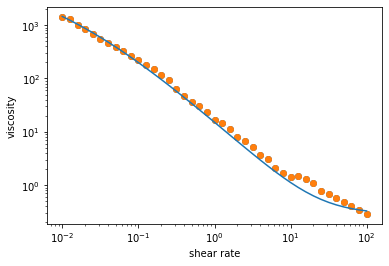

In [2]:
plotFitCurve("./Prueba35NCI65GelatinaQuitosano.csv",
             [[  0.0, 35000.0  ],
              [  0.0,     0.287],
              [110.0,   120.0  ],
              [  0.5,     1.0  ],
              [ -0.5,     0.0  ]]
            )